In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
dir_path = ''

# Import recipients
df2= pd.read_csv(dir_path+'/Data/Analysis/Recipients/recipients_2016.csv', low_memory=False,encoding='utf8',)

#Import donors
df3=pd.read_csv(dir_path+'/Data/Analysis/Donors/donors_2016.csv', low_memory=False,encoding='utf8',)


     RecipientName country_code country_type           gdp  \
0      Afghanistan          AFG         LDCs  1.960945e+10   
1      Afghanistan          AFG         LDCs  1.960945e+10   
2      Afghanistan          AFG         LDCs  1.960945e+10   
3      Afghanistan          AFG         LDCs  1.960945e+10   
4      Afghanistan          AFG         LDCs  1.960945e+10   
...            ...          ...          ...           ...   
1325      Zimbabwe          ZWE        LMICs  2.166100e+10   
1326      Zimbabwe          ZWE        LMICs  2.166100e+10   
1327      Zimbabwe          ZWE        LMICs  2.166100e+10   
1328      Zimbabwe          ZWE        LMICs  2.166100e+10   
1329      Zimbabwe          ZWE        LMICs  2.166100e+10   

      climate_class_number               climate_class meta_category  \
0                        0                  Adaptation    Adaptation   
1                        1                Solar-energy    Mitigation   
2                        3   Other-miti

In [4]:
### Preprocessing


In [4]:
# To indicate negative values for donors
df3.climate_funding=df3.climate_funding*(-1)
df3=df3[['country_code','climate_funding']].groupby('country_code').sum().reset_index()
df2=df2[['country_code','climate_funding']].groupby('country_code').sum().reset_index()

# concatenate donors and recipients
df = pd.concat([df2,df3])


In [ ]:
### List of Recipient Countries eligible for development aid
crs_countries= pd.read_csv('/projects_countries_long2.csv', low_memory=False,encoding='latin-1',)
print(crs_countries.shape)
crs_countries = crs_countries[['country_code','RecipientName','cluster']].groupby(['country_code','RecipientName']).size().reset_index()
crs_countries = crs_countries[crs_countries['country_code']!='missing']
crs_countries = crs_countries[['RecipientName','country_code']]
crs_countries['USD_Disbursement']=0
print(crs_countries)

In [7]:
# Shapefile for worldmap
import os
# import geopandas shapefile
shapefile = os.path.expanduser('/geomap/ne_110m_admin_0_countries.shp') #ne_10m_admin_0_countries_lakes.shp

#create natural earth data map from geo codes
gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
gdf.sample(5)
gdf.shape
gdf=gdf[gdf.ADM0_A3!="ATA"]
gdf.shape
print(gdf)

    ADM0_A3                                           geometry
0       FJI  MULTIPOLYGON (((16810130.626 -1718409.644, 167...
1       TZA  POLYGON ((3202917.599 -101604.324, 3218827.080...
2       SAH  POLYGON ((-791398.083 2957886.876, -791499.326...
3       CAN  MULTIPOLYGON (((-10141906.052 5223243.610, -10...
4       USA  MULTIPOLYGON (((-10141906.052 5223243.610, -99...
..      ...                                                ...
172     SRB  POLYGON ((1585599.314 4900532.058, 1585600.383...
173     MNE  POLYGON ((1723422.916 4550777.201, 1701164.495...
174     KOS  POLYGON ((1775267.006 4473185.031, 1765920.345...
175     TTO  POLYGON ((-5796692.599 1150802.640, -5741973.2...
176     SDS  POLYGON ((2910910.105 375312.612, 2827025.108 ...

[176 rows x 2 columns]


C:\Users\malte\Documents\GitHub\Climate_Finance_Bert\virtualenv\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\malte\Documents\GitHub\Climate_Finance_Bert\virtualenv\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [10]:
### Function For Worldmap

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
from matplotlib.colors import TwoSlopeNorm
plt.rcParams['font.family'] = "Arial"
plt.rcParams['figure.figsize'] = (10, 6)



def worldmap_funding(df,gdf,output_folder, development_countries,axis=True):
    df=df[df.country_code!='missing']

    vmax= df['climate_funding'].max()
    print(vmax)
    vmin=df['climate_funding'].min()
    print(vmin)
    vcenter= 0
    df=df.rename(columns={'country_code': 'Country Code'})
    df = gdf.merge(df, left_on='ADM0_A3', right_on='Country Code',how='outer')
    fig, ax = plt.subplots(1, 1)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter,  vmax=vmax)

    ax = df.plot(column='climate_funding', cmap='RdBu',
                                 edgecolor='black', linewidth=0.8, k=colors,
                                 legend=axis,
                                 norm=norm,
                                 cax=cax , #legend_kwds={'label': "Disbursements in million USD"},
                                 ax=ax,legend_kwds={'label': "Disbursements in million USD"},
                        missing_kwds={'color': 'lightgrey'}

    )


    legend_list=[]

    if axis==True:
        ax.legend(handles=legend_list, loc='lower right')
    ax.set_xlim([-1.4e7, 1.5e7])
    ax.set_ylim([-0.6e7, 0.85e7])
    ax.set_axis_off()
    plt.savefig(output_folder, bbox_inches = "tight", dpi=1200)

2352.6695940580003
-10225.547283119999


C:\Users\malte\Documents\GitHub\Climate_Finance_Bert\virtualenv\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\malte\Documents\GitHub\Climate_Finance_Bert\virtualenv\lib\site-packages\descartes\patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
C:\Users\malte\Documents\GitHub\Climate_Finance_Bert\virtualenv\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\malte\Documents\GitHub\Climate_Finance_Bert\virtualenv\lib\site-pa

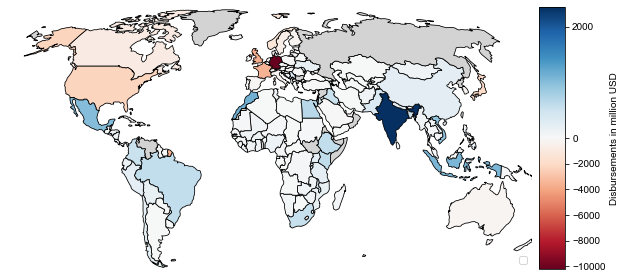

In [48]:
#Plot the Figure
plt.rcParams['font.family'] = "Arial"
plt.rcParams['figure.figsize'] = (10, 6)
output_folder=dir_path+'Figures/Fig2/worldmap.png'
worldmap_funding(df=df,gdf=gdf, output_folder=output_folder,development_countries=crs_countries)


